In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager
font_dirs = ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

import seaborn as sns
sns.set(font='AppleGothic')

import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [30]:
def get_url_genres(weekday):
    url = "https://comic.naver.com/webtoon/weekdayList.nhn?week=" + weekday + "&view=list&order=User"
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    tags = soup.select('tbody > tr > td > a')
    
    url_tag = []
    for tag in tags:
        a = tag['href']
        url_tag.append(a)

    result = url_tag[::2]
    a = "https://comic.naver.com"
    links = []
    for i in result:
        y = a+i
        links.append(y)
        
    genres = []
    for link in links:
        page = urlopen(link)
        soup = BeautifulSoup(page, "html.parser")
        genre = soup.find('span', 'genre').get_text()
        genres.append(genre)
        
    return genres

def get_weekday_genres_data_frame(weekday):
    genres = get_url_genres(weekday)
    
    title = weekday + "_genres"
    sub_name = weekday + "_c"
    df = pd.DataFrame(genres)
    df.columns = [title]
    df = df.groupby(title).size().reset_index(name=sub_name)
    return df

def get_weekday_frame(day):
    day_df = get_weekday_genres_data_frame(f"{day}")
    day_df.set_index(f'{day}_genres', inplace=True)
    return day_df

In [33]:
get_weekday_frame('mon')

,mon_c
mon_genres,
"스토리, 감성",1
"스토리, 드라마",12
"스토리, 로맨스",14
"스토리, 스릴러",3
"스토리, 스포츠",1
"스토리, 시대극",1
"스토리, 액션",5
"스토리, 판타지",12
"에피소드, 개그",1


In [34]:
get_weekday_frame('tue')

,tue_c
tue_genres,
"스토리, 감성",2
"스토리, 개그",1
"스토리, 드라마",14
"스토리, 로맨스",11
"스토리, 스릴러",8
"스토리, 스포츠",1
"스토리, 액션",7
"스토리, 판타지",11
"에피소드, 개그",3


In [35]:
get_weekday_frame('wed')

,wed_c
wed_genres,
"스토리, 드라마",10
"스토리, 로맨스",20
"스토리, 스릴러",6
"스토리, 스포츠",2
"스토리, 시대극",2
"스토리, 액션",5
"스토리, 판타지",7
"에피소드, 개그",3
"에피소드, 드라마",1


In [36]:
get_weekday_frame('thu')

,thu_c
thu_genres,
"스토리, 드라마",11
"스토리, 로맨스",14
"스토리, 스릴러",2
"스토리, 스포츠",2
"스토리, 액션",6
"스토리, 판타지",14
"에피소드, 개그",2
"에피소드, 드라마",2
"에피소드, 스릴러",1


In [37]:
get_weekday_frame('fri')

,fri_c
fri_genres,
"스토리, 개그",3
"스토리, 드라마",13
"스토리, 로맨스",11
"스토리, 스릴러",4
"스토리, 스포츠",1
"스토리, 시대극",1
"스토리, 액션",5
"스토리, 판타지",13
"에피소드, 드라마",2


In [38]:
get_weekday_frame('sat')

,sat_c
sat_genres,
"스토리, 드라마",9
"스토리, 로맨스",17
"스토리, 스릴러",7
"스토리, 스포츠",1
"스토리, 액션",3
"스토리, 판타지",12
"에피소드, 개그",1
"에피소드, 드라마",1
"에피소드, 로맨스",1


In [39]:
get_weekday_frame('sun')

,sun_c
sun_genres,
"스토리, 드라마",7
"스토리, 로맨스",13
"스토리, 스릴러",6
"스토리, 액션",5
"스토리, 판타지",17
"에피소드, 드라마",1
"에피소드, 로맨스",1
"에피소드, 액션",1
"에피소드, 일상",2


In [60]:
def get_soup(webtoon):
    url = webtoon
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    return soup

def get_url_tags(soup):
    tags = soup.select('ul > li > div > a')
    url_tag = []
    for tag in tags:
        a = tag['href']
        url_tag.append(a)
    return url_tag

def get_comics_by_full_week(url_tag):
    result = url_tag[3:]
    a = "https://comic.naver.com"
    links = []
    for i in result:
        y = a+i
        links.append(y)
    return links

def get_genres(links):
    genres = []
    for link in links:
        page = urlopen(link)
        soup = BeautifulSoup(page, "html.parser")
        genre = soup.find('span', 'genre').get_text()
        genres.append(genre)
    return genres

def get_genres_data_frame(webtoon):
    soup = get_soup(webtoon)
    tags = get_url_tags(soup)
    links = get_comics_by_full_week(tags)
    genres = get_genres(links)
    
    df = pd.DataFrame(genres)
    df.columns = ["full_genres"]
    df = df.groupby("full_genres").size().reset_index(name="counts")
    return df

full_df = get_genres_data_frame("https://comic.naver.com/webtoon/weekday.nhn")
full_df

,full_genres,counts
0,"스토리, 감성",3
1,"스토리, 개그",5
2,"스토리, 드라마",77
3,"스토리, 로맨스",82
4,"스토리, 스릴러",34
5,"스토리, 스포츠",9
6,"스토리, 시대극",2
7,"스토리, 액션",39
8,"스토리, 판타지",84
9,"에피소드, 개그",9


In [61]:
# r_full = full_df["counts"]/full_df["counts"].sum()
# r_full = pd.DataFrame(r_full)
# r_full.columns = ["r_full"]
# full_dff = pd.concat([full_df, r_full], axis=1)
full_df.set_index('full_genres', inplace=True)
full_df

,counts
full_genres,
"스토리, 감성",3
"스토리, 개그",5
"스토리, 드라마",77
"스토리, 로맨스",82
"스토리, 스릴러",34
"스토리, 스포츠",9
"스토리, 시대극",2
"스토리, 액션",39
"스토리, 판타지",84


In [62]:
dfs = pd.concat([mon_df, tue_df, wed_df, thu_df, fri_df, sat_df, sun_df, full_df], axis=1)
dfs.index.name="genres"
dfs.columns.name="weekday"
dfs.fillna(0)

weekday,mon_c,tue_c,wed_c,thu_c,fri_c,sat_c,sun_c,counts
genres,,,,,,,,
"스토리, 감성",1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
"스토리, 개그",1.0,2.0,0.0,0.0,2.0,0.0,0.0,5
"스토리, 드라마",13.0,13.0,10.0,10.0,16.0,9.0,6.0,77
"스토리, 로맨스",13.0,9.0,14.0,11.0,7.0,15.0,13.0,82
"스토리, 스릴러",5.0,5.0,7.0,1.0,5.0,7.0,4.0,34
"스토리, 스포츠",1.0,1.0,2.0,2.0,0.0,2.0,1.0,9
"스토리, 액션",7.0,5.0,6.0,6.0,4.0,5.0,6.0,39
"스토리, 판타지",9.0,10.0,7.0,14.0,12.0,14.0,18.0,84
"에피소드, 개그",1.0,2.0,3.0,2.0,0.0,1.0,0.0,9


In [65]:
dfss = dfs/dfs["counts"].sum()
dfss = dfss.drop(columns=["counts"])
dfss.fillna(0)

weekday,mon_c,tue_c,wed_c,thu_c,fri_c,sat_c,sun_c
genres,,,,,,,
"스토리, 감성",0.002545,0.005089,0.000000,0.000000,0.000000,0.000000,0.000000
"스토리, 개그",0.002545,0.005089,0.000000,0.000000,0.005089,0.000000,0.000000
"스토리, 드라마",0.033079,0.033079,0.025445,0.025445,0.040712,0.022901,0.015267
"스토리, 로맨스",0.033079,0.022901,0.035623,0.027990,0.017812,0.038168,0.033079
"스토리, 스릴러",0.012723,0.012723,0.017812,0.002545,0.012723,0.017812,0.010178
"스토리, 스포츠",0.002545,0.002545,0.005089,0.005089,0.000000,0.005089,0.002545
"스토리, 액션",0.017812,0.012723,0.015267,0.015267,0.010178,0.012723,0.015267
"스토리, 판타지",0.022901,0.025445,0.017812,0.035623,0.030534,0.035623,0.045802
"에피소드, 개그",0.002545,0.005089,0.007634,0.005089,0.000000,0.002545,0.000000


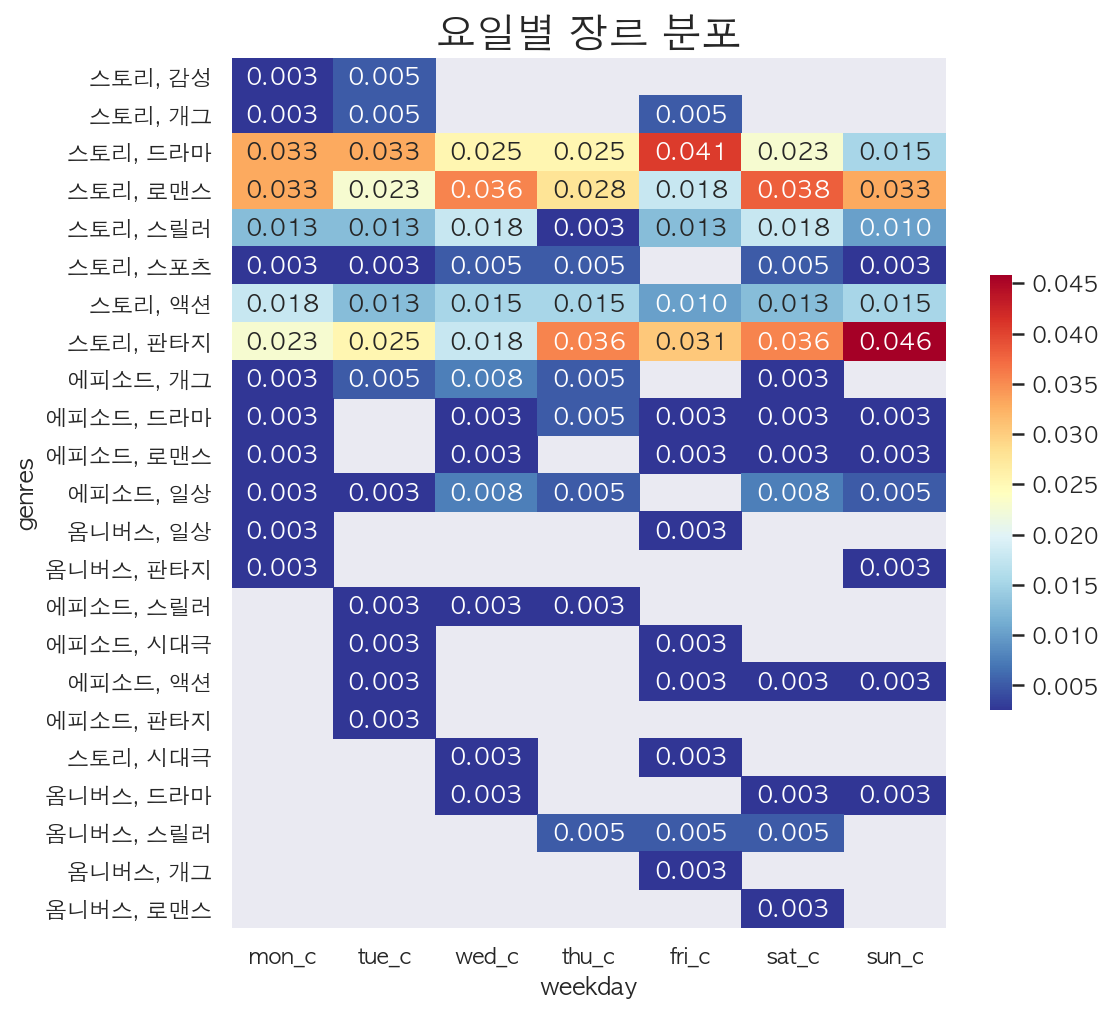

In [102]:
plt.figure(figsize=(8,8))
sns.heatmap(dfss, cmap="RdYlBu_r", annot=True, fmt='.3f', cbar_kws={"shrink":.5})
plt.title('요일별 장르 분포', fontsize=20)
plt.show()